# **CS473 - Assignment 1**

In [1]:
import numpy as np
import pandas as pd

First we prepare the data

In [2]:
data = pd.read_csv('data.csv')
labels = data['labels'].values
samples = data[['alcohol', 'color_intensity']].values

n_samples = np.array([132, 273, 216])

means = np.array([[13.744746, 5.528305],
                  [12.278732, 3.086620],
                  [13.15375, 7.39625]])

covs = np.array([[[0.213560, 0.233696],
                  [0.233696, 1.534063]
                 ],
                 [[0.289406, 0.134241],
                  [0.134241, 0.855494]
                 ],
                 [[0.281156, 0.429338],
                  [0.429338, 5.340454]]])

## Question A

1: We obtain the prior by simply using the proportion of the number of samples of the class to the total number of samples.

In [3]:
def prior(c: int):
    return n_samples[c] / np.sum(n_samples)

2.a: Having the sample, mean and cov. matrices, we can calculate the according likelihood using the formula of the (multivariate) Gaussian distribution, as found in the lecture slides and as shown during the tutorial. This is made simple using matrix operations.

In [4]:
from numpy.linalg import inv, det

def likelihood(sample, mean, cov):
    l = np.exp(-(1/2) * (sample - mean).T @ inv(cov) @ (sample - mean))
    l /= np.sqrt(((2 * np.pi) ** len(sample)) * det(cov))
    return l

2.b: We obtain the posterior by multiplying the likelihood with the prior and then normalising by diving by the sum of the posteriors (evidence).

In [5]:
def posterior(sample):
    post = np.empty(3)

    for i in range(3):
        post[i] = likelihood(sample, means[i], covs[i]) * prior(i)

    return post / np.sum(post)

3: Using the above posterior function, we can now get the prediction for each sample by finding the class with the highest posterior (index of the max, using argmax).

In [6]:
def get_prediction(sample):
    return np.argmax(posterior(sample))

pred = np.apply_along_axis(get_prediction, 1, samples)

print(f"Accuracy = {np.sum(pred == labels) / len(labels)}\n")

print("Predictions:")
print(pred)
print("Actual:")
print(labels)

Accuracy = 0.8111111111111111

Predictions:
[2 0 0 0 0 2 2 0 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 1 2 2 0 2 2 2 0 2 2 2 1 2 0 1]
Actual:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Question B

1: The risk for each prediction is calculated by summing the products of the posterior of every class with the according loss. We can use matrix multiplication to simplify this, for this reason we use the losses represented as a matrix.

In [7]:
prices = np.array([10, 12, 14])

losses = np.array([[ 0,  2, 4],
                   [-2,  0, 2],
                   [-4, -2, 0]])

def loss(a, w):
    return losses[a, w]

def risk(a, x):
    return losses[a] @ posterior(x)

2: Using the above risk function, we can now get the prediction for each sample that minimizes risk by finding the class with the lowest conditional risk (index of the min, using argmin).

In [9]:
def get_risk_prediction(sample):
    r = [risk(action, sample) for action in range(3)]
    return np.argmin(r)

risk_pred = np.apply_along_axis(get_risk_prediction, 1, samples)

print(f"Accuracy: {np.sum(risk_pred == labels) / len(labels)}")
print(f"Total risk: {np.sum(loss(risk_pred, labels))}", end=' ')
print(f"(Total risk for Q. A: {np.sum(loss(pred, labels))})\n")

print("Predictions:")
print(risk_pred)
print("Actual:")
print(labels)

Accuracy: 0.3333333333333333
Total risk: -180 (Total risk for Q. A: -2)

Predictions:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Actual:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


We can see that using risk-based predictions, we unsurprisingly get the lowest total risk possible, way lower than the previous implementation. This is because all the predictions are 2 - the class with the highest cost (which means the lowest loss), thus minimizing risk (from the seller's POV), and as a consequence the accuracy is only 1/3.

## Question C

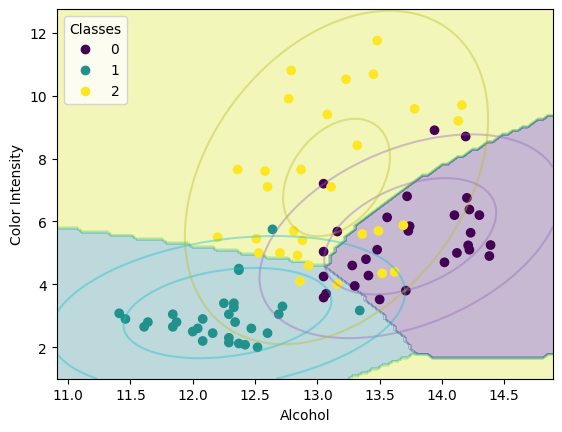

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

xlim = (np.min(data['alcohol']) - 0.5, np.max(data['alcohol']) + 0.5)
ylim = (np.min(data['color_intensity']) - 1, np.max(data['color_intensity']) + 1)
sample_rate = 100

x = np.linspace(xlim[0], xlim[1], sample_rate)
y = np.linspace(ylim[0], ylim[1], sample_rate)
xx, yy = np.meshgrid(x, y)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

z = np.apply_along_axis(get_prediction, 1, Xgrid).reshape(xx.shape)
plt.contourf(x, y, z, alpha=0.3)

cols = ['tab:purple', 'tab:cyan', 'tab:olive']
for i in range(3):
    w = np.apply_along_axis(likelihood, 1, Xgrid, means[i], covs[i]).reshape(xx.shape)
    plt.contour(x, y, w, levels=[0.01, 0.1], colors=cols[i], alpha=0.4)

scatter = plt.scatter(data['alcohol'], data['color_intensity'], c=labels)
plt.legend(*scatter.legend_elements(), loc="upper left", title="Classes")

plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()